In [3]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import utils
import os

In [1]:
num_agents = 10
num_iterations = 100
num_params = 61
#num_params = 25

In [5]:
prefix = ""
default = utils.read_csv(prefix + 'checkpoint/default.csv')[0]
default_params = default[:num_params]
default_metrics = default[num_params:]

FileNotFoundError: checkpoint/default.csv not found.

In [16]:
metrics = [pd.read_csv(prefix + 'history/iteration' + str(i) + '.csv', header=None, usecols=[num_params, num_params + 1]).transpose().to_numpy()
           for i in range(num_iterations)]


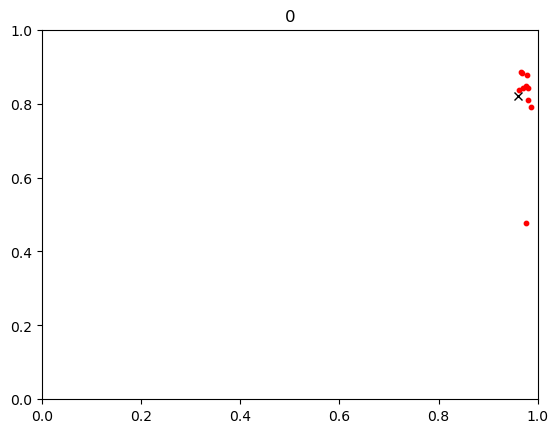

In [17]:
import matplotlib.animation as animation

fig, ax = plt.subplots()

def animate(i):
    fig.clear()
    ax = fig.add_subplot(111)
    ax.set_xlim(0., 1.0)
    ax.set_ylim(0.0, 1.0)
    # s = ax.scatter(metrics[0][1], 1 - metrics[0][0], s=10)
    s = ax.scatter(metrics[i][1], 1 - metrics[i][0], c='red', s=10)
    # s = ax.scatter(metrics[num_iterations - 1][1], 1 - metrics[num_iterations - 1][0], c='green', s=10)
    s = ax.plot([default_metrics[1]], [1 - default_metrics[0]], 'x', color='black')
    # ax.set_xlabel(r'fakes $=\frac{(N_{rec}-N_{ass})}{N_{rec}}$')
    # ax.set_ylabel(r'eff $=\frac{N_{ass}}{N_{sim}}$')
    # ax.legend(loc='best')
    ax.set_title(str(i))

ani=animation.FuncAnimation(fig, animate, interval=200, frames=range(num_iterations))
ani.save(prefix+'checkpoint/metrics.gif', writer='pillow')


In [18]:
pareto_front = utils.read_csv(prefix+'checkpoint/pareto_front.csv')
pareto_front = pareto_front[pareto_front[:, num_params + 1].argsort()]
pareto_x = [particle[num_params + 1] for particle in pareto_front]

pareto_y = [1 - particle[num_params] for particle in pareto_front]
# pareto_z = [particle[6] for particle in pareto_front]
# pareto_t = [particle[5] + particle[6] for particle in pareto_front]

In [19]:
len(pareto_front)

36

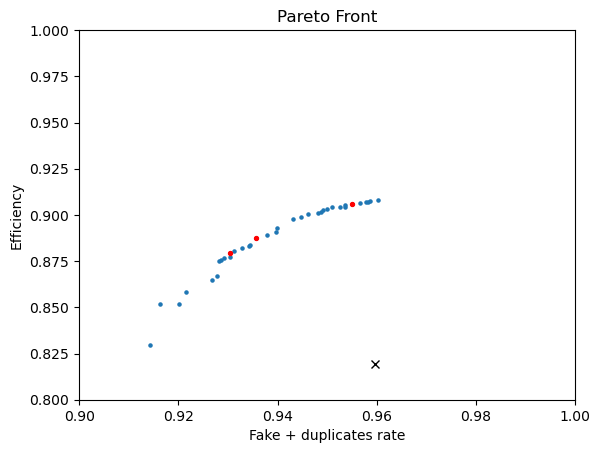

In [21]:
point1 = pareto_front[10]
point2 = pareto_front[15]
point3 = pareto_front[30]


plt.scatter(pareto_x, pareto_y, s=5)
plt.plot(default_metrics[1], 1 - default_metrics[0], 'x', color='black')
plt.scatter([point1[num_params + 1], point2[num_params + 1], point3[num_params + 1]], 
            [1 - point1[num_params], 1 - point2[num_params], 1 - point3[num_params]], color='red', s=8)
# plt.scatter([point1[5] + point1[6], point2[5] + point2[6], point3[5] + point3[6]], [1 - point1[4], 1 - point2[4], 1 - point3[4]], color='red', s=8)

# plt.scatter(point1[5], 1 - point1[4], color='red', s=8)
plt.xlim(0.9, 1.0)
plt.ylim(0.8, 1.0)
plt.xlabel('Fake + duplicates rate')
plt.ylabel('Efficiency')
plt.title('Pareto Front')
plt.savefig(prefix+'checkpoint/pf.png')
plt.show()


In [24]:
print([point1[i] for i in range(num_params)])
print([point2[i] for i in range(num_params)])
print([point3[i] for i in range(num_params)])

[0.001242390138406142, 0.011016622026881959, 0.019025541369135528, 0.3243260897863999, 0.6992549152294786, 13.518495965430047, 828.2806972577172, 499.95947615886695, 497.1881923475101, 549.4323175780296, 458.92696273985996, 527.1192085534236, 617.51671312508, 510.1782613274464, 463.6333016215595, 1000.0, 784.6042389631943, 845.2974525785024, 771.6882367643036, 871.6430666012137, 541.6692194928603, 849.9942372372989, 707.6874180284698, 552.2610643798458, 839.421078553105]
[0.001222545436655035, 0.013595020631356806, 0.021022132822038814, 0.28687813655021843, 0.727251284126227, 12.137115093865255, 942.3715445400439, 568.3454636878149, 542.1595215918978, 653.7344190343659, 400.0, 545.6131340699769, 458.96529199339443, 548.4565266298832, 419.6168439445876, 1000.0, 941.174097275878, 611.0974478127922, 763.6765823830119, 978.0460927376467, 431.2284296949365, 738.0117721766212, 751.1667314228008, 424.31430406228316, 834.130107809801]
[0.001636378529271592, 0.01827425280693685, 0.0389684159745

In [25]:
selected_params = [default_params, point1[:num_params], point2[:num_params], point3[:num_params]]
# selected_params

In [26]:
utils.write_csv('checkpoint/selected_params.csv', selected_params)

In [25]:
# print(point1)
# print(point2)
# print(point3)